In [1]:
#	Library
#============================================================
import os
import numpy as np
import healpy as hp
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from numpy import sqrt, exp, log10, pi
from scipy.integrate import trapezoid
from scipy.optimize import curve_fit

from astropy import units as u
from astropy import constants as const
from astropy.table import Table, QTable, join, vstack
from astropy.cosmology import FlatLambdaCDM

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 200
plt.rc('font', family='serif')

## Sample code for mapping

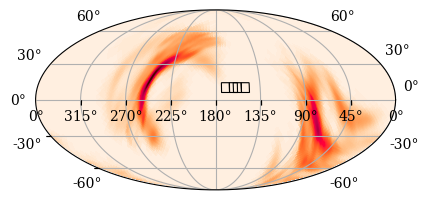

In [2]:
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import units as u
import ligo.skymap.plot
from matplotlib import pyplot as plt

url = '../0.info/GW190425_GWTC-2.fits.gz'
# url = 'https://dcc.ligo.org/public/0146/G1701985/001/bayestar_no_virgo.fits.gz'
# center = SkyCoord.from_name('NGC 4993')
# print(center)


fig = plt.figure(figsize=(4, 4), dpi=100)

ax = plt.axes(
    [0.05, 0.05, 0.9, 0.9],
    # projection='astro globe',
    projection='astro degrees mollweide',
	)


for ra in [150, 158, 162, 170]:
    center = SkyCoord(ra, 10, unit='degree')

    ax_inset = plt.axes(
        [0.59, 0.3, 1e-10, 1e-10],
        projection='astro zoom',
        center=center,
        radius=4*u.deg)

    ax_inset.spines['bottom'].set_color('red')
    ax_inset.spines['top'].set_color('red') 
    ax_inset.spines['right'].set_color('red')
    ax_inset.spines['left'].set_color('red')
    ax_inset.tick_params(axis='both', colors='red')

    for key in ['ra', 'dec']:
        ax_inset.coords[key].set_ticklabel_visible(False)
        ax_inset.coords[key].set_ticks_visible(False)
    ax.mark_inset_axes(ax_inset)

ax.imshow_hpx(url, cmap='cylon')
ax.grid()

## ZTF+GECKO follow-up

### ZTF

In [3]:
ztftbl = ascii.read('../3.table/GW190425.ZTF.survey.dat')
ztftbl

id,status,position,ra,dec,galaxy_catalog,galaxy_catalogid,instrumentid,depth,depth_err,depth_unit,time,datecreated,dateupdated,submitterid,pos_angle,band,doi_url,doi_id,central_wave,bandwidth
int64,str9,str36,float64,float64,str1,str1,int64,float64,str1,int64,str26,str26,str1,int64,float64,str1,str1,str1,float64,float64
31711,completed,POINT (180 62.15),180.0,62.15,--,--,47,20.4624,--,1,2019-04-25T08:18:18.002869,2021-12-01T18:40:08.737316,--,69,0.0,r,--,--,6415.4,1487.58
31712,completed,POINT (-168.61 54.95),-168.61,54.95,--,--,47,20.9536,--,1,2019-04-25T08:18:58.999669,2021-12-01T18:40:08.743806,--,69,0.0,r,--,--,6415.4,1487.58
31713,completed,POINT (-165.05015 47.75),-165.05015,47.75,--,--,47,21.0551,--,1,2019-04-25T08:19:38.000624,2021-12-01T18:40:08.749341,--,69,0.0,r,--,--,6415.4,1487.58
31714,completed,POINT (-167.75 40.55),-167.75,40.55,--,--,47,20.8092,--,1,2019-04-25T08:20:17.001620,2021-12-01T18:40:08.754743,--,69,0.0,r,--,--,6415.4,1487.58
31715,completed,POINT (-159.13319 40.55),-159.13319,40.55,--,--,47,21.0121,--,1,2019-04-25T08:20:56.996173,2021-12-01T18:40:08.760125,--,69,0.0,r,--,--,6415.4,1487.58
31716,completed,POINT (-150.51637 40.55),-150.51637,40.55,--,--,47,21.044,--,1,2019-04-25T08:21:36.999376,2021-12-01T18:40:08.765398,--,69,0.0,r,--,--,6415.4,1487.58
31717,completed,POINT (-155.27546 47.75),-155.27546,47.75,--,--,47,20.9148,--,1,2019-04-25T08:22:16.000331,2021-12-01T18:40:08.770679,--,69,0.0,r,--,--,6415.4,1487.58
31718,completed,POINT (-157.59888 54.95),-157.59888,54.95,--,--,47,20.8795,--,1,2019-04-25T08:22:56.003534,2021-12-01T18:40:08.775988,--,69,0.0,r,--,--,6415.4,1487.58
31719,completed,POINT (-153.33333 62.15),-153.33333,62.15,--,--,47,20.8136,--,1,2019-04-25T08:23:34.002241,2021-12-01T18:40:08.781299,--,69,0.0,r,--,--,6415.4,1487.58


r-band

In [4]:
rztbl = ztftbl[ztftbl['band']=='r']
gztbl = ztftbl[ztftbl['band']=='g']

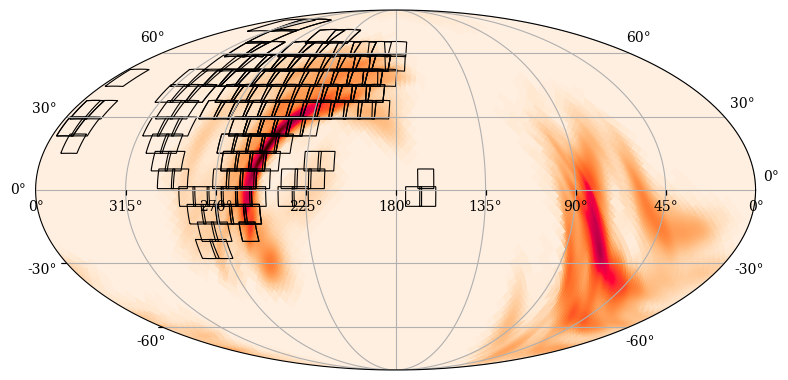

In [5]:
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import units as u
import ligo.skymap.plot
from matplotlib import pyplot as plt

url = '../0.info/GW190425_GWTC-2.fits.gz'

fig = plt.figure(figsize=(8, 4),)

ax = plt.axes(
    [0.05, 0.05, 0.9, 0.9],
    # projection='astro globe',
    projection='astro degrees mollweide',
	)


for ra, dec in zip(rztbl['ra'], rztbl['dec']):
    center = SkyCoord(ra, dec, unit='degree')

    ax_inset = plt.axes(
        [0.59, 0.3, 1e-10, 1e-10],
        projection='astro zoom',
        center=center,
        radius=4*u.deg)

    ax_inset.spines['bottom'].set_color('red')
    ax_inset.spines['top'].set_color('red') 
    ax_inset.spines['right'].set_color('red')
    ax_inset.spines['left'].set_color('red')
    ax_inset.tick_params(axis='both', colors='red')

    for key in ['ra', 'dec']:
        ax_inset.coords[key].set_ticklabel_visible(False)
        ax_inset.coords[key].set_ticks_visible(False)
    ax.mark_inset_axes(ax_inset)

ax.imshow_hpx(url, cmap='cylon')
ax.grid()

plt.savefig('../4.plot/map.ztf_r.png')
plt.savefig('../4.plot/map.ztf_r.pdf')

g-band

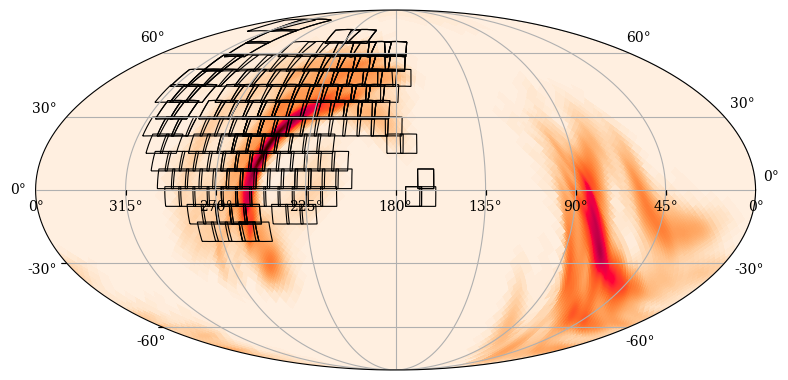

In [6]:
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import units as u
import ligo.skymap.plot
from matplotlib import pyplot as plt

url = '../0.info/GW190425_GWTC-2.fits.gz'

fig = plt.figure(figsize=(8, 4),)

ax = plt.axes(
    [0.05, 0.05, 0.9, 0.9],
    # projection='astro globe',
    projection='astro degrees mollweide',
	)


for ra, dec in zip(gztbl['ra'], gztbl['dec']):
    center = SkyCoord(ra, dec, unit='degree')

    ax_inset = plt.axes(
        [0.59, 0.3, 1e-10, 1e-10],
        projection='astro zoom',
        center=center,
        radius=4*u.deg)

    ax_inset.spines['bottom'].set_color('red')
    ax_inset.spines['top'].set_color('red') 
    ax_inset.spines['right'].set_color('red')
    ax_inset.spines['left'].set_color('red')
    ax_inset.tick_params(axis='both', colors='red')

    for key in ['ra', 'dec']:
        ax_inset.coords[key].set_ticklabel_visible(False)
        ax_inset.coords[key].set_ticks_visible(False)
    ax.mark_inset_axes(ax_inset)

ax.imshow_hpx(url, cmap='cylon')
ax.grid()

plt.savefig('../4.plot/map.ztf_g.png')
plt.savefig('../4.plot/map.ztf_g.pdf')

g, r-band

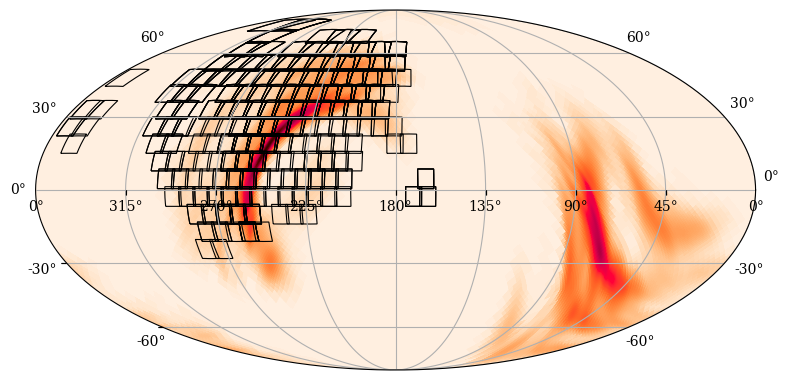

In [7]:
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import units as u
import ligo.skymap.plot
from matplotlib import pyplot as plt

url = '../0.info/GW190425_GWTC-2.fits.gz'

fig = plt.figure(figsize=(8, 4),)

ax = plt.axes(
    [0.05, 0.05, 0.9, 0.9],
    # projection='astro globe',
    projection='astro degrees mollweide',
	)


for ra, dec in zip(ztftbl['ra'], ztftbl['dec']):
    center = SkyCoord(ra, dec, unit='degree')

    ax_inset = plt.axes(
        [0.59, 0.3, 1e-10, 1e-10],
        projection='astro zoom',
        center=center,
        radius=4*u.deg)

    ax_inset.spines['bottom'].set_color('red')
    ax_inset.spines['top'].set_color('red') 
    ax_inset.spines['right'].set_color('red')
    ax_inset.spines['left'].set_color('red')
    ax_inset.tick_params(axis='both', colors='red')

    for key in ['ra', 'dec']:
        ax_inset.coords[key].set_ticklabel_visible(False)
        ax_inset.coords[key].set_ticks_visible(False)
    ax.mark_inset_axes(ax_inset)

ax.imshow_hpx(url, cmap='cylon')
ax.grid()

plt.savefig('../4.plot/map.ztf_gr.png')
plt.savefig('../4.plot/map.ztf_gr.pdf')

KMTNet R-band

In [8]:
gcktbl = ascii.read('../3.table/phot.all.dat')
kmtntbl = gcktbl[
	(gcktbl['obs']=='SSO') |
	(gcktbl['obs']=='CTIO') |
	(gcktbl['obs']=='SAAO')
]
kmtntbl

image,obs,obj,ra,dec,date-obs,jd,filter,stdnumb,zp,zper,seeing,skyval,skysig,ul_3sig,ul_5sig,mag,magerr,aper_dia_pix,note
str78,str12,str23,float64,float64,str26,float64,str1,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,str14
a000038.kk-1.fits,SSO,a000038.kk.fits,255.73044915000003,-6.9246918,2019-04-26T13:02:39,2458600.044,R,28,28.979,0.015,4.586,525.045,19.266,21.305,20.75,-99,-99,22.92,phot
a000038.kk-2.fits,SSO,a000038.kk.fits,255.6030896,-6.901528,2019-04-26T13:02:39,2458600.044,R,67,28.986,0.017,4.577,524.687,19.674,21.291,20.737,-99,-99,22.88,phot
a000038.kk-3.fits,SSO,a000038.kk.fits,255.47351995,-6.89786735,2019-04-26T13:02:39,2458600.044,R,61,28.988,0.015,4.571,521.902,19.496,21.303,20.749,-99,-99,22.86,phot
a000038.kk-4.fits,SSO,a000038.kk.fits,255.3450405,-6.9226347,2019-04-26T13:02:39,2458600.044,R,70,28.991,0.015,4.624,523.746,19.808,21.278,20.723,-99,-99,23.12,phot
a000038.kk-5.fits,SSO,a000038.kk.fits,255.21900685,-6.9308647,2019-04-26T13:02:39,2458600.044,R,67,29.015,0.023,4.608,517.585,19.628,21.314,20.76,-99,-99,23.04,phot
a000038.kk-6.fits,SSO,a000038.kk.fits,255.0926335,-6.9358479,2019-04-26T13:02:39,2458600.044,R,45,29.013,0.01,4.605,504.441,19.297,21.332,20.777,-99,-99,23.02,phot
a000038.kk-7.fits,SSO,a000038.kk.fits,254.9654236,-6.94154245,2019-04-26T13:02:39,2458600.044,R,68,29.048,0.016,4.58,511.771,19.797,21.345,20.791,-99,-99,22.9,phot
a000038.kk-8.fits,SSO,a000038.kk.fits,254.84173529999998,-6.933021,2019-04-26T13:02:39,2458600.044,R,42,29.062,0.02,4.541,504.474,19.744,21.372,20.817,-99,-99,22.7,phot
a000038.mm-1.fits,SSO,a000038.mm.fits,256.79840675,-6.9269967999999995,2019-04-26T13:02:39,2458600.044,R,74,29.061,0.066,4.924,530.331,19.631,21.288,20.734,-99,-99,24.62,phot


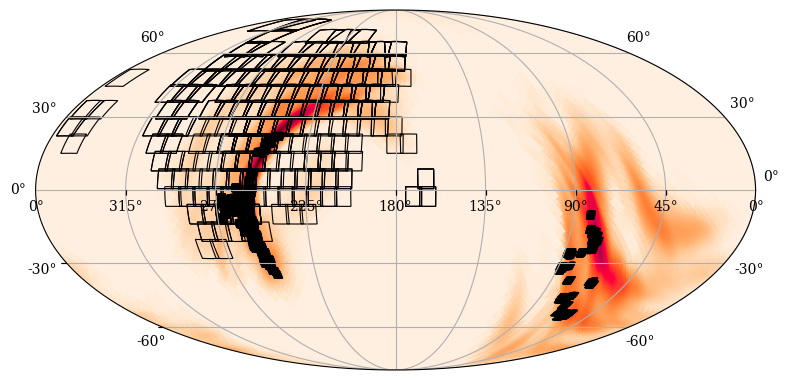

In [9]:
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import units as u
import ligo.skymap.plot
from matplotlib import pyplot as plt

url = '../0.info/GW190425_GWTC-2.fits.gz'

fig = plt.figure(figsize=(8, 4),)

ax = plt.axes(
    [0.05, 0.05, 0.9, 0.9],
    # projection='astro globe',
    projection='astro degrees mollweide',
	)


for ra, dec in zip(kmtntbl['ra'], kmtntbl['dec']):
    center = SkyCoord(ra, dec, unit='degree')

    ax_inset = plt.axes(
        [0.59, 0.3, 1e-10, 1e-10],
        projection='astro zoom',
        center=center,
        radius=1*u.deg)

    ax_inset.spines['bottom'].set_color('red')
    ax_inset.spines['top'].set_color('red') 
    ax_inset.spines['right'].set_color('red')
    ax_inset.spines['left'].set_color('red')
    ax_inset.tick_params(axis='both', colors='red')

    for key in ['ra', 'dec']:
        ax_inset.coords[key].set_ticklabel_visible(False)
        ax_inset.coords[key].set_ticks_visible(False)
    ax.mark_inset_axes(ax_inset)

ax.imshow_hpx(url, cmap='cylon')
ax.grid()

plt.savefig('../4.plot/map.kmtnet_R.png')
plt.savefig('../4.plot/map.kmtnet_R.pdf')


for ra, dec in zip(ztftbl['ra'], ztftbl['dec']):
    center = SkyCoord(ra, dec, unit='degree')

    ax_inset = plt.axes(
        [0.59, 0.3, 1e-10, 1e-10],
        projection='astro zoom',
        center=center,
        radius=4*u.deg)

    # ax_inset.spines['bottom'].set_color('red')
    # ax_inset.spines['top'].set_color('red') 
    # ax_inset.spines['right'].set_color('red')
    # ax_inset.spines['left'].set_color('red')
    # ax_inset.tick_params(axis='both', colors='red')

    for key in ['ra', 'dec']:
        ax_inset.coords[key].set_ticklabel_visible(False)
        ax_inset.coords[key].set_ticks_visible(False)
    ax.mark_inset_axes(ax_inset)

plt.savefig('../4.plot/map.gecko+ztf.png')
plt.savefig('../4.plot/map.gecko+ztf.pdf')
